In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# Compresión de los datos
## Recoleccion de los datos iniciales

Los datos utilizados son referentes a la calidad de la produccion de vinos. 


Los datos se obtuvieron de: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


## Descripción de los datos

Los datos se encuentran almacenados en archivos Excel (.csv) y se manipularan mediante Python.

In [2]:
wine=pd.read_csv('wineEDA.csv', sep=',')
wine

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binned
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Medium
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Medium
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medium
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medium
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medium


## Reevaluar el modelo con datos normalizados

Normalización de los Datos

La normalización es el proceso de transformar los valores de algunas variables dentro de un rango similar. La normalización típica incluye el redimensionado de las variables para que el promedio sea 0 y la varianza 1, o para que los valores del rango sean entre 0 y 1.

In [3]:
# intercambia (valor original) por (valor original)/(valor máximo)
wine['fixed acidity'] = wine['fixed acidity']/wine['fixed acidity'].max()
wine['volatile acidity'] = wine['volatile acidity']/wine['volatile acidity'].max()
wine['citric acid'] = wine['citric acid']/wine['citric acid'].max()
wine['residual sugar'] = wine['residual sugar']/wine['residual sugar'].max()
wine['chlorides'] = wine['chlorides']/wine['chlorides'].max()
wine['free sulfur dioxide'] = wine['free sulfur dioxide']/wine['free sulfur dioxide'].max()
wine['total sulfur dioxide'] = wine['total sulfur dioxide']/wine['total sulfur dioxide'].max()
wine['density'] = wine['density']/wine['density'].max()
wine['pH'] = wine['pH']/wine['pH'].max()
wine['sulphates'] = wine['sulphates']/wine['sulphates'].max()
wine['alcohol'] = wine['alcohol']/wine['alcohol'].max()


## Análisis de Componentes Principales (PCA)


Se realiza un análisis de los componentes principales

In [4]:
x = wine.drop(columns= ['quality', 'quality_binned'])
y = wine['quality_binned']

Estandariza características removiendo la media y escalando a una variable unitaria

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-1.73096794 -0.52835961  0.96187667 ...  1.28864292 -0.57920652
  -0.96024611]
 [-1.72880152 -0.29854743  1.96744245 ... -0.7199333   0.1289504
  -0.58477711]
 [-1.7266351  -0.29854743  1.29706527 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [ 1.7266351  -1.1603431  -0.09955388 ...  0.70550789  0.54204194
   0.54162988]
 [ 1.72880152 -1.39015528  0.65462046 ...  1.6773996   0.30598963
  -0.20930812]
 [ 1.73096794 -1.33270223 -1.21684919 ...  0.51112954  0.01092425
   0.54162988]]


In [6]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

Gráfica para visualizar los componentes principales

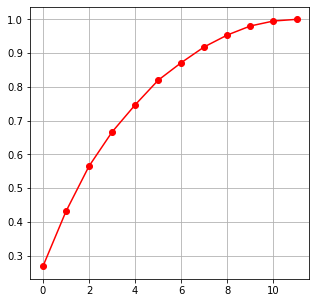

In [7]:
#plot the graph to find the principal components
pyplot.figure(figsize=(5,5))
pyplot.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
pyplot.grid()

In [8]:
#Se eligieron 8 componentes principales
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [9]:
print(x_new)

[[-1.10503704  1.01738783 -2.23928527 ...  1.55757089 -0.25757413
   0.03852203]
 [-0.31147729  2.23038887 -1.10113815 ...  0.64264773  1.51369661
  -0.30310965]
 [-0.27670935  1.30491076 -1.49627925 ...  0.91764327  0.93835103
   0.0340857 ]
 ...
 [-1.83311006  0.02614818  1.422036   ... -0.73639299 -0.75308498
  -0.85309862]
 [-2.58477688  0.79211269  0.95249609 ... -0.65716789 -1.00202224
  -1.02165416]
 [-0.87709224 -0.93222218  1.89664547 ... -0.65064108 -1.23110205
   0.57016129]]


Como se puede observar en la gráfica, se pueden reducir las características que no influyen en el sistema

# Modelado

In [10]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=0)

Datos de entrenamiento y prueba

In [11]:
print('x train: ', len(x_train))
print('y train: ', len(y_train))
print('x test: ', len(x_test))
print('y test: ', len(y_test))

x train:  1199
y train:  1199
x test:  400
y test:  400


Posterior a esto se ejecutan los modelos

No tuvo ningún efecto en los modelos


## Logistic Regression


La regresión logística es un método estadístico para predecir clases binarias, describe y estima la relación entre una variable binaria dependiente y las variables independientes.

* Este método es uno de los algoritmos de aprendizaje automático más simples y comúnmente utilizados para la clasificación de dos clases.
* Calcula la probabilidad de ocurrencia de un evento binario utilizando una función logit.
* El resultado o la variable objetivo es de naturaleza dicotómic
* La variable dependiente en la regresión logística sigue la distribución de Bernoulli.
* La estimación se realiza mediante el método de estimación de máxima verosimilitud (MLE).

In [12]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter= 10000)
reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
y_pred = reg.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, roc_auc_score
print(classification_report(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Training score: ', reg.score(x_train, y_train)*100)

              precision    recall  f1-score   support

        High       0.52      0.38      0.44        45
         Low       0.00      0.00      0.00        16
      Medium       0.88      0.96      0.92       339

    accuracy                           0.85       400
   macro avg       0.47      0.44      0.45       400
weighted avg       0.81      0.85      0.83       400

Confusion matrix:  [[ 17   0  28]
 [  1   0  15]
 [ 15   0 324]]
Training score:  83.23603002502085


C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
score_lr = accuracy_score(y_test, y_pred)*100
print("Logistic Regression accuracy score: ", score_lr)

Logistic Regression accuracy score:  85.25


## K Nearest Neighbors Classifier (KNN)
### Algoritmo de clasificación de los K vecinos próximos

* Para encontrar similaridad entre puntos, se encuentra la distancia entre estos, para ello utiliza medidas como distancia Euclidiana, distancia de Manhattan, distancia de Hamming y la distancia de Minkowski
* Funciona bien con datos de pocas características
* K es el número de vecinos a evaluar

Se crea el objeto KNN y se ajusta el modelo de entrenamiento

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

Se crea el objeto de predicción y evalua

In [16]:
y_pred = knn.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", knn.score(x_train, y_train)*100)
print("Testing Score:  ", knn.score(x_test, y_test)*100)

              precision    recall  f1-score   support

        High       0.46      0.40      0.43        45
         Low       0.00      0.00      0.00        16
      Medium       0.88      0.93      0.91       339

    accuracy                           0.83       400
   macro avg       0.45      0.44      0.44       400
weighted avg       0.80      0.83      0.82       400

[[ 18   0  27]
 [  0   0  16]
 [ 21   2 316]]
Training Score:  86.82235195996664
Testing Score:   83.5


Se promedia los resultados de pruebas y entrenamiento

In [17]:
score_knn = accuracy_score(y_test, y_pred)*100
print("KNN accuracy Score: ", score_knn)

KNN accuracy Score:  83.5



# Decision Tree Classifier

Árbol de decisión


El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante el aprendizaje de reglas de decisión simples inferidas de las características de los datos. 

* Cuanto más profundo es el árbol, más complejas son las reglas de decisión y más ajustado es el modelo.

* Los árboles de decisión son fáciles de interpretar y visualizar.

* Requiere menos procesamiento previo de datos por parte del usuario, por ejemplo, no hay necesidad de normalizar columnas.

* Sensible a datos ruidosos. Puede sobreajustarse a datos ruidosos. Esto se debe controlar mediante la profundidad del arbol.


In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=0)

dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

In [19]:
y_pred=dtree.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ",dtree.score(x_train, y_train)*100)


              precision    recall  f1-score   support

        High       0.56      0.60      0.58        45
         Low       0.50      0.06      0.11        16
      Medium       0.91      0.94      0.92       339

    accuracy                           0.86       400
   macro avg       0.66      0.53      0.54       400
weighted avg       0.85      0.86      0.85       400

[[ 27   0  18]
 [  1   1  14]
 [ 20   1 318]]
Training Score:  90.07506255212677


In [20]:
score_ds = accuracy_score(y_test, y_pred)*100
print("Decision Tree accuracy Score: ", score_ds)

Decision Tree accuracy Score:  86.5


## Pipeline

In [21]:
from sklearn.pipeline import make_pipeline # https://stackoverflow.com/questions/40708077/what-is-the-difference-between-pipeline-and-make-pipeline-in-scikit

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',ExtraTreesClassifier())]

In [23]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', ExtraTreesClassifier())])

In [24]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', ExtraTreesClassifier())])

In [25]:
y_pipe=pipe.predict(x_test)

In [26]:
print(classification_report(y_test, y_pipe))
print(confusion_matrix(y_test, y_pipe))
print("Training Score: ", pipe.score(x_train, y_train)*100)
print("Testing Score: ", pipe.score(x_test, y_test)*100)

              precision    recall  f1-score   support

        High       0.78      0.56      0.65        45
         Low       0.00      0.00      0.00        16
      Medium       0.90      0.98      0.94       339

    accuracy                           0.89       400
   macro avg       0.56      0.51      0.53       400
weighted avg       0.85      0.89      0.87       400

[[ 25   0  20]
 [  0   0  16]
 [  7   0 332]]
Training Score:  100.0
Testing Score:  89.25


C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
pipeScore = accuracy_score(y_test, y_pipe)*100
print("Pipeline accuracy Score: ", pipeScore)

Pipeline accuracy Score:  89.25



## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", rfc.score(x_train, y_train)*100)
print("Testing Score: ", rfc.score(x_test, y_test)*100)

              precision    recall  f1-score   support

        High       0.83      0.53      0.65        45
         Low       0.00      0.00      0.00        16
      Medium       0.90      0.99      0.94       339

    accuracy                           0.90       400
   macro avg       0.58      0.51      0.53       400
weighted avg       0.86      0.90      0.87       400

[[ 24   0  21]
 [  0   0  16]
 [  5   0 334]]
Training Score:  100.0
Testing Score:  89.5


C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
score_rf = accuracy_score(y_test, y_pred)*100
print("Random Forest accuracy Score: ", score_rf)

Random Forest accuracy Score:  89.5



## C - Support Vector Classifier (SVC)

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [32]:
y_pred = svc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", svc.score(x_train, y_train)*100)
print("Testing Score: ", svc.score(x_test, y_test)*100)

C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        High       0.74      0.31      0.44        45
         Low       0.00      0.00      0.00        16
      Medium       0.88      0.99      0.93       339

    accuracy                           0.87       400
   macro avg       0.54      0.43      0.46       400
weighted avg       0.83      0.87      0.84       400

[[ 14   0  31]
 [  0   0  16]
 [  5   0 334]]
Training Score:  84.82068390325271
Testing Score:  87.0


In [33]:
score_svc = accuracy_score(y_test, y_pred)*100
print("SVC accuracy Score: ", score_svc)

SVC accuracy Score:  87.0



## Ada Boost Classifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [35]:
y_pred = adb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", adb.score(x_train, y_train)*100)
print("Testing Score: ", adb.score(x_test, y_test)*100)

              precision    recall  f1-score   support

        High       0.32      0.58      0.41        45
         Low       0.00      0.00      0.00        16
      Medium       0.90      0.81      0.85       339

    accuracy                           0.75       400
   macro avg       0.41      0.46      0.42       400
weighted avg       0.80      0.75      0.77       400

[[ 26   0  19]
 [  3   0  13]
 [ 52  12 275]]
Training Score:  75.14595496246872
Testing Score:  75.25


In [36]:
score_ada = accuracy_score(y_test, y_pred)*100
print("Ada Boost accuracy Score: ", score_ada)

Ada Boost accuracy Score:  75.25



## Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [38]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", gbc.score(x_train, y_train)*100)
print("Testing Score: ", gbc.score(x_test, y_test)*100)

              precision    recall  f1-score   support

        High       0.70      0.42      0.53        45
         Low       0.00      0.00      0.00        16
      Medium       0.89      0.98      0.93       339

    accuracy                           0.88       400
   macro avg       0.53      0.47      0.49       400
weighted avg       0.83      0.88      0.85       400

[[ 19   0  26]
 [  0   0  16]
 [  8   0 331]]
Training Score:  96.3302752293578
Testing Score:  87.5


C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
score_gb = accuracy_score(y_test, y_pred)*100
print("Gradient Boosting accuracy Score: ", score_gb)

Gradient Boosting accuracy Score:  87.5



## XGB Classifier

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[22:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\avazq\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred = xgb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Training Score: ", xgb.score(x_train, y_train)*100)
print("Testing Score: ", xgb.score(x_test, y_test)*100)

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        45
         Low       0.00      0.00      0.00        16
      Medium       0.85      1.00      0.92       339

    accuracy                           0.85       400
   macro avg       0.28      0.33      0.31       400
weighted avg       0.72      0.85      0.78       400

[[  0   0  45]
 [  0   0  16]
 [  0   0 339]]
Training Score:  81.7347789824854
Testing Score:  84.75


C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avazq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
score_xgb = accuracy_score(y_test, y_pred)*100
print("XGB accuracy Score: ", score_xgb)

XGB accuracy Score:  84.75



## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [44]:
y_pred = gnb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("Training Score: ",gnb.score(x_train, y_train)*100)
print("Testing Score: ", gnb.score(x_test, y_test)*100)

              precision    recall  f1-score   support

        High       0.51      0.44      0.48        45
         Low       0.10      0.06      0.08        16
      Medium       0.89      0.92      0.90       339

    accuracy                           0.83       400
   macro avg       0.50      0.48      0.49       400
weighted avg       0.82      0.83      0.82       400

[[ 20   1  24]
 [  0   1  15]
 [ 19   8 312]]
0.8325
Training Score:  81.7347789824854
Testing Score:  83.25


In [45]:
score_nb = accuracy_score(y_test, y_pred)*100
print("Naive Bayes accuracy Score: ", score_nb)

Naive Bayes accuracy Score:  83.25


### Resumen con los resultados

In [46]:
abstract = pd.DataFrame({"Model":['Logistic Regression','KNN Classifier','Decision Tree Classifier', 'Random Forest Classifier', 
                                'SVC Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier','XGB Classifier',
                                'Naive Bayes Classifier', 'Pipeline'],
                      "Accuracy":[score_lr, score_knn, score_ds, score_rf, score_svc, score_ada, score_gb, score_xgb, score_nb, pipeScore]})

In [47]:
print(abstract)

                          Model  Accuracy
0           Logistic Regression     85.25
1                KNN Classifier     83.50
2      Decision Tree Classifier     86.50
3      Random Forest Classifier     89.50
4                SVC Classifier     87.00
5           AdaBoost Classifier     75.25
6  Gradient Boosting Classifier     87.50
7                XGB Classifier     84.75
8        Naive Bayes Classifier     83.25
9                      Pipeline     89.25


## Conclusiones

Por Adilene Calderón, Aaron Lara, Adrían Vázquez. Introducción a la Ciencia de Datos y sus Metodologías. [MCD UNISON](https://mcd.unison.mx)

## Referencias
I_Prerna_Kalura(2021). Breast cancer solution. https://www.kaggle.com/iprernakalura/breast-cancer-solution

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://scikit-learn.org/stable/modules/tree.html

https://www.kaggle.com/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data
